# Probability Distributions

## Uniform Distribution

In [1]:
import scipy.stats as stats

In [2]:
#To generate random data from the distibution
# Syntax - stats.(distribution_type).(function) 

In [3]:
uni_data = stats.uniform.rvs(size=1000000, loc=50, scale= 450)
type(uni_data)

numpy.ndarray

<AxesSubplot:ylabel='Density'>

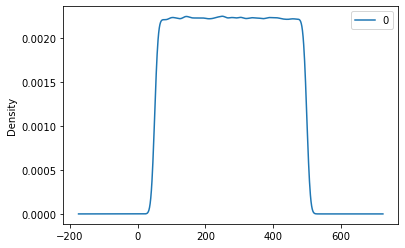

In [4]:
import pandas as pd
pd.DataFrame(uni_data).plot(kind="density")
#the greater the size more better the uniformity will be seen 

### CUMULATIVE Distribution Funtion - used to find the prob that the random no. falls below a particulR value
Gives the probab that the random value falls below a paricular value x

In [5]:
#CDF EXAMPLE
stats.uniform.cdf(x=100,loc=50,scale=450)

0.1111111111111111

In [6]:
#CDF Ques
cdf_280 = stats.uniform.cdf(x=280,loc=260,scale=80)
cdf_280

0.25

In [7]:
cdf_320 = stats.uniform.cdf(x=320,loc=260,scale=80)
cdf_320

0.75

In [8]:
Prob = (cdf_320 - cdf_280)
Prob

0.5

### PPF (Point percentile Function)
If prob is given and the x is unknown

In [9]:
# Parameters : prob, loc= start pt. , scale = end-start
stats.uniform.ppf(0.5,loc=260,scale=80)


300.0

### PDF (Prob density function) 
Prob per unit area - 

In [10]:
stats.uniform.pdf(x=285,loc=260,scale=80)

0.0125

# Normal Distribution
loc - mean,
scale - stdev 

In [11]:
#Loc = mean and scale =stdev. In this case, mean=10, stdev=2
stats.norm.rvs(size=10,loc=10,scale=2)

array([ 8.76153874,  9.8700693 , 10.89453317,  9.25425531, 10.95854152,
       14.1893094 ,  9.7736854 ,  8.91131615,  9.42800286,  7.81482252])

# Standard Normal Distribution
Mean=0 , Stdev=1

In [12]:
#Area of rejected region on the left
lr = stats.norm.cdf(x=-1,loc=0,scale=1)
lr

0.15865525393145707

In [13]:
#Area of region to the left of point 1
rr = stats.norm.cdf(x=1,loc=0,scale=1)
rr

0.8413447460685429

In [14]:
#Area of desired region (mid region of bell curver removing rejecting region)
rr-lr

0.6826894921370859

In [15]:
#Example ques
# Mean height is 100 cm and stdev is 10cm
# 1. % of people having heights < 80cm
# 2. % of people having height >120cm
# 3. % of people having height between 80cm and 120cm
# Sol1.
h = stats.norm.cdf(x=80,loc=100,scale=10)



In [16]:
# Sol2.
g = stats.norm.cdf(x=120,loc=100,scale=10)
1-g


0.02275013194817921

In [17]:
# Sol3.
g-h


0.9544997361036416

In [18]:
#Setting seed to generate same set of numbers everytime : array([19, 25, 74, 38, 99])
import numpy as np
np.random.seed(10)
np.random.randint(low=10,high=100,size=5)

array([19, 25, 74, 38, 99])

# Confidence Intervals

In [19]:
np.random.seed(10)
point_est= []

sample_size = 1000

# Hypothesis Testing

## 1 sample t-Test
1. when we have to compare 1 sample with pop, 1 sample t test

In [20]:
#Random data for normal Population of weights having mean=50 and sd=30
wt_kg = stats.norm.rvs(size=1000000,loc=50,scale=30)  #generating random values

In [21]:
wt_kg.mean()

49.98670258460591

In [24]:
#New Sample of the data haing mean = 30 and stdev = 15
wt_samp = stats.norm.rvs(size=30,loc=30,scale=15)
type(wt_samp)

numpy.ndarray

In [26]:
#Checking whether this sample belongs to the population data
pd.set_option('display.float_format',lambda x:'%3f'%x)
stats.ttest_1samp(wt_samp,wt_kg.mean())

Ttest_1sampResult(statistic=-6.370512844408641, pvalue=5.794148321868617e-07)

### 2 sample t-test

In [37]:
#Sample 1 having mean=20 and sd=10
sample1 =  stats.norm.rvs(size=40 ,loc=20 ,scale=10)
sample1

array([17.2129905 , 36.50340314, 44.32066525, 15.4406937 , 18.87379149,
       20.04891578, 18.45779608, -0.65368695, -0.55978486, 31.2875953 ,
       30.4409901 , 18.14018124,  9.66536005, 22.92421798, 39.91084643,
        7.45279227, 10.51201759, 17.96501893,  9.92421882, 17.8946216 ,
       40.36614507,  1.99667204, 25.94548294, 22.73795949, 26.9108421 ,
       28.76666417, 21.94112775, 18.96503052, 29.34861772, 14.64389841,
        3.03260123, 10.37702212, 13.94179124, 37.18017243, 25.11158652,
       27.29155133, 15.98173413, 25.61684938, 41.11481353, 25.55073748])

In [35]:
#Another sample haing mean=30 and sd=15
sample2 = stats.norm.rvs(size=40,loc=30,scale=15) 

In [39]:
#Assumption is made that variances are equal in 2 population
stats.ttest_ind(sample1,sample2,equal_var=True)  

Ttest_indResult(statistic=-2.742218754985243, pvalue=0.007565695634261881)

reject H0:mean of sample1= mean of sample2 as p<alpha  

# Paired t-test
Dependent samples for eg same people records before and after taking meds

In [40]:

#1st sample of bloop pressure generating randomly having average bp is 120 and sd is 20
bp_before = stats.norm.rvs(size=100,loc=120,scale=20)

In [42]:
#As dependent samples as needed so adding some noise
bp_after = bp_before + stats.norm.rvs(size=100,loc=5,scale=3) 

In [43]:
#Hypothesis : H0 : mean of bp_before-bp_after = 0 
stats.ttest_rel(bp_before,bp_after)

Ttest_relResult(statistic=-17.297840736713546, pvalue=1.1009958088718882e-31)

# ANOVA

In [44]:
import pandas as od

In [45]:
plants = pd.read_csv("Plant_growth.csv")

In [46]:
plants.head()

,weight,treatment_type
0,4.170000,ctrl
1,5.580000,ctrl
2,5.180000,ctrl
3,6.110000,ctrl
4,4.500000,ctrl


In [47]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   weight          30 non-null     float64
 1   treatment_type  30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 608.0+ bytes


Check if there is a significance difference in weight of plants after adding fertilizer.
H0 : mu_trt1 group = mu_trt2 group = mu_ctrl group.
Ha : any 1 is not equal.

In [50]:
#Dividing group wise 
plants['treatment_type'].value_counts()

trt2    10
ctrl    10
trt1    10
Name: treatment_type, dtype: int64

In [57]:
ctrl = plants[plants['treatment_type']=="ctrl"]['weight']
ctrl

0   4.170000
1   5.580000
2   5.180000
3   6.110000
4   4.500000
5   4.610000
6   5.170000
7   4.530000
8   5.330000
9   5.140000
Name: weight, dtype: float64

In [58]:
trt1 = plants[plants['treatment_type']=="trt1"]['weight']
trt1

10   4.810000
11   4.170000
12   4.410000
13   3.590000
14   5.870000
15   3.830000
16   6.030000
17   4.890000
18   4.320000
19   4.690000
Name: weight, dtype: float64

In [59]:
trt2 = plants[plants['treatment_type']=="trt2"]['weight']
trt2

20   6.310000
21   5.120000
22   5.540000
23   5.500000
24   5.370000
25   5.290000
26   4.920000
27   6.150000
28   5.800000
29   5.260000
Name: weight, dtype: float64

In [60]:
stats.f_oneway(ctrl,trt1,trt2)

F_onewayResult(statistic=4.846087862380136, pvalue=0.0159099583256229)

Since p-value < 0.05, so we reject the H0

# Chi square test for INDEPENDENCE
H0 : There is no relationship b/w 2 vars , and
Ha : There is a relationship b/w 2 vars

In [61]:
ob_die = [52,76,45,48,43,36]
exp_die= [50,50,50,50,50,50]

In [62]:
stats.chisquare(ob_die,exp_die)  #Reject the H0 as p<alpha

Power_divergenceResult(statistic=19.08, pvalue=0.0018572859497089486)

# Covariance
how 2 variables vary together

In [63]:
car = pd.read_csv("CARS.csv")
car.head()

,name_of_car,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.500000,6.000000,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.000000,4.000000,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.400000,4.000000,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.200000,6.000000,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.500000,6.000000,225,18,24,3880,115,197


In [65]:
car.cov()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.228982,1.561558,62.708992,-4.119941,-4.565384,679.742938,5.865143,10.146386
Cylinders,1.561558,2.428743,90.915272,-5.598177,-6.061022,878.933841,7.097586,12.264601
Horsepower,62.708992,90.915272,5160.415434,-254.637057,-266.919603,34392.465364,231.310436,393.542729
MPG_City,-4.119941,-5.598177,-254.637057,27.438924,28.299930,-2933.945632,-22.086673,-37.719944
MPG_Highway,-4.565384,-6.061022,-266.919603,28.299930,32.961386,-3446.716934,-25.036694,-38.420927
Weight,679.742938,878.933841,34392.465364,-2933.945632,-3446.716934,576055.520060,4798.913546,7519.483005
Wheelbase,5.865143,7.097586,231.310436,-22.086673,-25.036694,4798.913546,69.086235,106.117326
Length,10.146386,12.264601,393.542729,-37.719944,-38.420927,7519.483005,106.117326,206.151913


In [66]:
car.corr()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000
